In [88]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import random
import numpy as np

In [89]:
g = Graph()
#g.parse("sto/sto-enriched-relatedTo.nt", format="nt")
g.parse('sto/transitive_closure/transitive.nt', format="nt")
#g.parse('sto/relatedTo/training_set_relatedTo.nt', format="nt")
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
       PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
       PREFIX sto: <https://w3id.org/i40/sto#>
    
    select distinct ?s where {
            ?s ?p ?o .
    }""")
        
entities = pd.DataFrame(columns=['s'])
obj = []
for row in qres:
    obj.append(str("%s" %row))
entities.s=obj

In [90]:
entities.shape

(249, 1)

# Check number of independent cluster

In [91]:
cosine_matrix = pd.DataFrame(index=entities.s.tolist(), columns=entities.s.tolist())
cosine_matrix = cosine_matrix.fillna(0)

g = Graph()
#g.parse("sto/sto-enriched-relatedTo.nt", format="nt")
g.parse('sto/transitive_closure/transitive.nt', format="nt")
#g.parse('sto/relatedTo/training_set_relatedTo.nt', format="nt")

prop = 'relatedTo'
list_pd = pd.DataFrame(columns=['s', 'p', 'o'])
for i in range(entities.shape[0]):
    standard = entities.s[i]
    qres = g.query(
        """PREFIX owl: <http://www.w3.org/2002/07/owl#>
            PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
            PREFIX sto: <https://w3id.org/i40/sto#>
            select distinct ?o where {
                <""" +standard+ """> sto:""" +prop+ """ ?o .
            }""")
    lst = pd.DataFrame(columns=['s', 'p', 'o'])
    obj = []
    for row in qres:
        obj.append(str("%s" %row))
    
    if len(obj)>0:
        for col in obj:
            cosine_matrix.at[standard, col] = 1

In [92]:
cosine_matrix.head(15)

,https://w3id.org/i40/sto#IEC_61850_P7_S1_E1,https://w3id.org/i40/sto#IEC_27036,https://w3id.org/i40/sto#ISO_9000,https://w3id.org/i40/sto#IEC_61810_P7_E2,https://w3id.org/i40/sto#IEC_60255_P1_E1,https://w3id.org/i40/sto#DIN_EN_50159,https://w3id.org/i40/sto#IEC_60870_P6_S502_E1,https://w3id.org/i40/sto#ISO_14739-1,https://w3id.org/i40/sto#NIST_500-293,https://w3id.org/i40/sto#RFC_7540,...,https://w3id.org/i40/sto#IEC_61010_P2_S012_E1,https://w3id.org/i40/sto#ISO_15531-3x,https://w3id.org/i40/sto#IEC_60286_P4_E3,https://w3id.org/i40/sto#IEC_60050_1998,https://w3id.org/i40/sto#RFC_7643,https://w3id.org/i40/sto#ISO_20140_5,https://w3id.org/i40/sto#IEC_60286_P3_E5,https://w3id.org/i40/sto#IEC_61690_P1_E1,https://w3id.org/i40/sto#IEC_61310_P2_E2,https://w3id.org/i40/sto#IEC_60864_P2_E1
https://w3id.org/i40/sto#IEC_61850_P7_S1_E1,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#IEC_27036,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#ISO_9000,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#IEC_61810_P7_E2,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#IEC_60255_P1_E1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#DIN_EN_50159,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#IEC_60870_P6_S502_E1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#ISO_14739-1,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#NIST_500-293,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://w3id.org/i40/sto#RFC_7540,1,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#pd.value_counts(cosine_matrix.values, 0)
cosine_matrix = cosine_matrix.fillna(0)
sum =0
col = cosine_matrix.columns
for i in range(len(cosine_matrix.columns)):
    sum+=pd.value_counts(cosine_matrix[col[i]].values, 0)[0]

In [94]:
sum

39032

In [95]:
len(col)*len(cosine_matrix.index)

62001

In [96]:
39032/62001

0.6295382332543024

In [44]:
# connected components in an undirected graph 
class Graph: 
      
    # init function to declare class variables 
    def __init__(self,V): 
        self.V = V 
        self.adj = [[] for i in range(V)] 
  
    def DFSUtil(self, temp, v, visited): 
  
        # Mark the current vertex as visited 
        visited[v] = True
  
        # Store the vertex to list 
        temp.append(v) 
  
        # Repeat for all vertices adjacent 
        # to this vertex v 
        for i in self.adj[v]: 
            if visited[i] == False: 
                  
                # Update the list 
                temp = self.DFSUtil(temp, i, visited) 
        return temp 
  
    # method to add an undirected edge 
    def addEdge(self, v, w): 
        self.adj[v].append(w) 
        self.adj[w].append(v) 
  
    # Method to retrieve connected components
    # in an undirected graph
    def connectedComponents(self):
        visited = []
        cc = []
        for i in range(self.V):
            visited.append(False)
        for v in range(self.V):
            if visited[v] == False:
                temp = []
                cc.append(self.DFSUtil(temp, v, visited))
        return cc

In [45]:
array = np.arange(0, 247).tolist()
cosine_matrix.index =array
cosine_matrix.head(10)

,https://w3id.org/i40/sto#ISO_27036,https://w3id.org/i40/sto#ISO_10303,https://w3id.org/i40/sto#ISO_27018,https://w3id.org/i40/sto#IEEE_1686,https://w3id.org/i40/sto#IEC_60870_P6_S2_1995,https://w3id.org/i40/sto#IEC_61158,https://w3id.org/i40/sto#MathML,https://w3id.org/i40/sto#RFC_1122,https://w3id.org/i40/sto#ISO_29190,https://w3id.org/i40/sto#IEC_61131,...,https://w3id.org/i40/sto#IEC_60255_P149_E1,https://w3id.org/i40/sto#RFC_7643,https://w3id.org/i40/sto#IEC_61691_P6_E1,https://w3id.org/i40/sto#ETSI_LTN,https://w3id.org/i40/sto#IEC_60381_P2_E1,https://w3id.org/i40/sto#IEC_61400_P25_S5_E2,https://w3id.org/i40/sto#IEC_60286_P5_E3,https://w3id.org/i40/sto#ISO_15531,https://w3id.org/i40/sto#IEC_60050_2013,https://w3id.org/i40/sto#IEC_60864_P2_E1
0,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
2,0,1,0,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,NaN,NaN
3,0,0,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,NaN,NaN
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
5,0,1,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,NaN,NaN
6,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN
7,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,NaN,NaN
8,1,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,NaN,NaN
9,1,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,NaN,NaN


In [47]:
graph = Graph(249);
column = cosine_matrix.columns
for i in range(len(column)):
    index = cosine_matrix.loc[cosine_matrix[column[i]] == 1].index.tolist()
    if len(index)>0:
        for j in index:
            graph.addEdge(j, i)

In [48]:
cc = graph.connectedComponents()
print("Following are connected components")
print((cc))
count=0
for k in cc:
    if len(k)>1:
        print(len(k))
        count+=len(k)
    else:
        print('desconected: '+ str(k))

print(count)

Following are connected components
[[0, 1, 2, 3, 6, 5, 7, 10, 8, 11, 13, 9, 14, 12, 15, 17, 18, 20, 22, 21, 23, 25, 24, 26, 30, 27, 29, 31, 32, 33, 35, 34, 36, 37, 38, 40, 39, 42, 41, 43, 44, 45, 46, 49, 47, 50, 48, 53, 52, 51, 55, 57, 56, 59, 58, 62, 60, 63, 64, 65, 67, 66, 68, 69, 70, 73, 72, 75, 74, 76, 77, 78, 79, 81, 80, 84, 82, 83, 85, 86, 89, 87, 90, 88, 91, 92, 93, 94, 96, 98, 95, 100, 97, 99, 103, 102, 101, 106, 104, 107, 108, 111, 109, 112, 113, 114, 115, 116, 118, 117, 119, 120, 121, 122, 125, 123, 127, 126, 124, 128, 130, 132, 133, 134, 135, 136, 142, 137, 141, 145, 147, 146, 148, 149, 150, 151, 152, 153, 155, 154, 156, 157, 160, 161, 164, 163, 171, 165], [4, 16, 28, 131, 71, 105, 110, 138, 140, 143, 166, 170, 174, 173, 175, 178, 180, 179, 184, 190, 212, 204, 188, 216], [19, 218, 215], [54, 61, 139, 144, 162, 177, 167, 181, 172, 193, 194, 196, 209, 211], [129, 206, 226, 214, 222, 231, 232], [158, 217, 235, 239, 237], [159, 224, 229, 247], [168, 191, 213, 233], [169, 176, 18

In [49]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

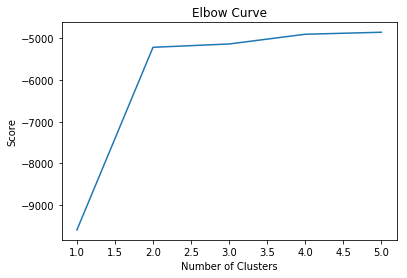

In [52]:
cosine_matrix = cosine_matrix.fillna(0)
X=cosine_matrix
Nc = range(1, 6)
kmeans = [KMeans(n_clusters=i) for i in Nc]
#print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

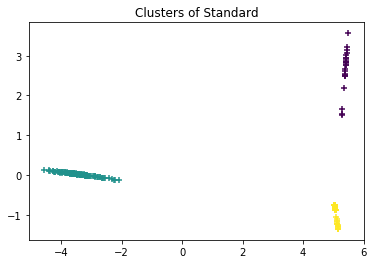

In [62]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X)
pca_c = pca.transform(X)
#kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(cosine_matrix)

plt.scatter(pca_c[:, 0], pca_c[:, 1], c=kmeans.labels_, marker='+')
plt.title("Clusters of Standard")

plt.show()

In [63]:
pd.value_counts(kmeans.labels_, 0)

0     24
1    148
2     75
dtype: int64

In [64]:
list_cluster = pd.DataFrame()
list_cluster.insert(0, 'standards', entities.s.tolist())
list_cluster.insert(1, 'clusters', kmeans.labels_)
list_cluster.head()

,standards,clusters
0,https://w3id.org/i40/sto#ISO_27036,1
1,https://w3id.org/i40/sto#ISO_10303,1
2,https://w3id.org/i40/sto#ISO_27018,1
3,https://w3id.org/i40/sto#IEEE_1686,1
4,https://w3id.org/i40/sto#IEC_60870_P6_S2_1995,0


In [65]:
cls_0 = list_cluster.loc[list_cluster['clusters'] == 0]
cls_1 = list_cluster.loc[list_cluster['clusters'] == 1]
cls_2 = list_cluster.loc[list_cluster['clusters'] == 2]

cls_0['standards'].to_csv('result/cluster-0.txt', index=False)
cls_1['standards'].to_csv('result/cluster-1.txt', index=False)
cls_2['standards'].to_csv('result/cluster-2.txt', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


In [9]:
#standard = "https://w3id.org/i40/sto#RFC_1122"
standard = "?s"
prop = 'relatedTo'
qres = g.query(
    """PREFIX owl: <http://www.w3.org/2002/07/owl#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        PREFIX sto: <https://w3id.org/i40/sto#>
        select distinct ?s where {
            """ +standard+ """ sto:""" +prop+ """ ?o .
        }""")
sto = []
for row in qres:
    sto.append(str("%s" %row))
len(sto)

232

In [12]:
qres = g.query(
    """PREFIX sto: <https://w3id.org/i40/sto#>
        select ?sto1 where {
            ?sto1 sto:relatedTo ?sto2 .
            ?sto2 sto:relatedTo ?sto3 .
            ?sto1 sto:relatedTo ?sto3 .
        }""")

sto = []
for row in qres:
    sto.append(str("%s" %row))
print('firtst query: ', len(sto))

qres = g.query(
    """PREFIX sto: <https://w3id.org/i40/sto#>
        select ?sto1 where {
            ?sto1 sto:relatedTo ?sto2 .
            ?sto2 sto:relatedTo ?sto3 .
        }""")
sto = []
for row in qres:
    sto.append(str("%s" %row))
print('second query: ', len(sto))

firtst query:  61517
second query:  84775
